# Database for a time domain survey


This database stores the information of stars imaged from a certain patch of the sky divided into different sub-areas, that constitute a field, in different filters. The filters used are Z, Y, J, H and Ks, where Ks band is re-observed to attain more information about the lightcurve of the stars. 

This database is built and populated through sqlite3 using Python. It has 18 individual tables for each combination of Filter and Field. Python is used for the sole reason that unlike sqlite it allows looping. This is helpful as looping reduces the length of the code and enables us to create and populate all 18 tables at once. 
 

In the following block, all the modules necessary for further tasks is imported.

In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

## Converting a .fits file to a .csv file
The data provided is in the .fits format. Although this format is useful for storing the data, it cannot be read into the database directly through sqlite3. Popularly sqlite3 reads .csv files without a hassel. Hence this conversion is made.

In [2]:
for r in ['1-H','1-J','1-Ks-E001','1-Ks-E002','1-Ks-E003','1-Y','1-Z','2-H','2-J','2-Ks-E001','2-Y','2-Z','3-H','3-J','3-Ks-E001','3-Ks-E002','3-Y','3-Z']:
    filename='Field-' + r + '.fits'
    data = fits.getdata(filename, 1)
    t = Table(data)
    t.write('Field-' + r +'.csv',overwrite=True)
    

## Creating and populating the database 
Once the data from each field and filter is converted into .csv files, they can easily be read into the database as tables through sqlite3 using python. The database is named "Database" with very less creativity. 

### Creating and populating the Reference table
This is intended to be a Relational Database, as it links each of the 18 tables to a single Reference table by their filenames. The Reference Table acts as the child table in which the 18 foreign keys are introduced hence linking it to the 18 parent tables. This makes sure that any changes made to one table is updated in the other linking table such that there is no ambuiguity and confusion in the changed data. The Reference table is created and populated in the following block. 

In [6]:
import sqlite3 as lite 
import csv
var= ('Field_1_H','Field_1_J','Field_1_Ks_E001','Field_1_Ks_E002','Field_1_Ks_E003','Field_1_Y','Field_1_Z','Field_2_H','Field_2_J','Field_2_Ks_E001','Field_2_Y','Field_2_Z','Field_3_H','Field_3_J','Field_3_Ks_E001','Field_3_Ks_E002','Field_3_Y','Field_3_Z')

con=lite.connect('Database.db')

with con:
    cur=con.cursor()
    command= "CREATE TABLE IF NOT EXISTS {0}(ID INT, FieldID INT, Filename varchar(20), Filter varchar(20), MJD FLOAT, Airmass FLOAT, Exptime FLOAT, FOREIGN KEY (Filename) REFERENCES Field_1_H (filename),FOREIGN KEY (Filename) REFERENCES Field_1_J (filename),FOREIGN KEY (Filename) REFERENCES Field_1_Ks_E001 (filename),FOREIGN KEY (Filename) REFERENCES Field_1_Ks_E002 (filename),FOREIGN KEY (Filename) REFERENCES Field_1_Ks_E003 (filename),FOREIGN KEY (Filename) REFERENCES Field_1_Y (filename),FOREIGN KEY (Filename) REFERENCES Field_1_Z (filename),FOREIGN KEY (Filename) REFERENCES Field_2_H (filename),FOREIGN KEY (Filename) REFERENCES Field_2_J (filename),FOREIGN KEY (Filename) REFERENCES Field_2_Ks_E001 (filename),FOREIGN KEY (Filename) REFERENCES Field_2_Y (filename),FOREIGN KEY (Filename) REFERENCES Field_2_Z (filename),FOREIGN KEY (Filename) REFERENCES Field_3_H (filename),FOREIGN KEY (Filename) REFERENCES Field_3_J (filename),FOREIGN KEY (Filename) REFERENCES Field_3_Ks_E001 (filename),FOREIGN KEY (Filename) REFERENCES Field_3_Ks_E002 (filename)FOREIGN KEY (Filename) REFERENCES Field_3_Y (filename),FOREIGN KEY (Filename) REFERENCES Field_3_Z (filename));".format('Reference')
    cur.execute(command)
    
    with open('Reference.csv','rb') as fin:
        dr=csv.DictReader(fin)
        
        for j,i in enumerate(dr):
            to_db = (i['ID'], i['FieldID'], i['Filename'], i['Filter'], i['MJD'],
                     i['Airmass'], i['Exptime'])
            print to_db
            cur.execute("INSERT INTO Reference (ID,FieldID,Filename,Filter,MJD,Airmass,Exptime) VALUES (?,?,?,?,?,?,?);",to_db)
            cur.execute("INSERT INTO Reference (Filename) VALUES (?);",(var[j],))
            j=j+1
con.commit()
con.close()   


('1', '1', 'Field-1-Z.csv', 'Z', '57267.1671072', '1.6405', '40.0')
('2', '1', 'Field-1-J.csv', 'J', '57257.0504323', '1.0105', '48.0')
('3', '1', 'Field-1-H.csv', 'H', '57257.044108', '1.006', '16.0')
('4', '1', 'Field-1-Ks-E002.csv', 'Ks', '56788.346937', '1.023', '16.0')
('5', '1', 'Field-1-Ks-E001.csv', 'Ks', '56561.0020158', '1.079', '16.0')
('6', '1', 'Field-1-Ks-E003.csv', 'Ks', '56829.0390512', '1.6085', '16.0')
('7', '1', 'Field-1-Y.csv', 'Y', '57267.1596647', '1.5605', '40.0')
('8', '2', 'Field-2-Z.csv', 'Z', '57268.1671072', '1.6405', '40.0')
('9', '2', 'Field-2-J.csv', 'J', '57258.0504323', '1.0105', '48.0')
('10', '2', 'Field-2-H.csv', 'H', '57258.044108', '1.006', '16.0')
('11', '2', 'Field-2-Ks-E001.csv', 'Ks', '56789.346937', '1.023', '16.0')
('12', '2', 'Field-2-Y.csv', 'Y', '57268.1596647', '1.5605', '40.0')
('13', '3', 'Field-3-Z.csv', 'Z', '57268.1671072', '1.6405', '40.0')
('14', '3', 'Field-3-J.csv', 'J', '57258.0504323', '1.0105', '48.0')
('15', '3', 'Field-3-H.c

Reference: https://alvinalexander.com/android/sqlite-foreign-keys-example

### Creating and populating the 18 data tabels
In the following block the 18 data tables are created and populated just as is done for the Reference table.

In [7]:

con=lite.connect('Database.db')
tn=['Field_1_H','Field_1_J','Field_1_Ks_E001','Field_1_Ks_E002','Field_1_Ks_E003','Field_1_Y','Field_1_Z','Field_2_H','Field_2_J','Field_2_Ks_E001','Field_2_Y','Field_2_Z','Field_3_H','Field_3_J','Field_3_Ks_E001','Field_3_Ks_E002','Field_3_Y','Field_3_Z']
j=0
for r in ['1-H','1-J','1-Ks-E001','1-Ks-E002','1-Ks-E003','1-Y','1-Z','2-H','2-J','2-Ks-E001','2-Y','2-Z','3-H','3-J','3-Ks-E001','3-Ks-E002','3-Y','3-Z']:    
    with con:
        cur=con.cursor()
        tablename='Field-'+ r
        tname= tablename + '.csv'
        cur.execute("CREATE TABLE IF NOT EXISTS {} (RunningID FLOAT, X FLOAT, Y FLOAT, Flux1 FLOAT,dFlux1 FLOAT, Flux2 FLOAT, dFlux2 FLOAT, Flux3 FLOAT, dFlux3 FLOAT, Ra FLOAT, Dec FLOAT, Class FLOAT, Mag1 FLOAT, dMag1 FLOAT, Mag2 FLOAT, dMag2 FLOAT, Mag3 FLOAT, dMag3 FLOAT, StarID INT, filename varchar(20));".format(tn[j]))

        with open(tname,'rb') as fin:
            dr=csv.DictReader(fin)
            for i in dr:
                to_db = (i['RunningID'], i['X'], i['Y'], i['Flux1'], i['dFlux1'],
                         i['Flux2'], i['dFlux2'],i['Flux3'],i['dFlux3'],i['Ra'],
                         i['Dec'],i['Class'],i['Mag1'],i['dMag1'],i['Mag2'],i['dMag2'],
                         i['Mag3'],i['dMag3'],i['StarID'])
                cur.execute("INSERT INTO " + tn[j] +"(RunningID,X,Y,Flux1,dFlux1,Flux2,dFlux2,Flux3,dFlux3,Ra,Dec,Class,Mag1,dMag1,Mag2,dMag2,Mag3,dMag3,StarID) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);",to_db)
    j=j+1
con.commit()
con.close() 


    

In the block below, to each of the 18 tables, a column called 'filename' is added and populated with its filename. This acts as a primary key which is linked to the foreign key 'Filename' in the Reference Table. 

In [8]:
con=lite.connect('Database.db')
tn=['Field_1_H','Field_1_J','Field_1_Ks_E001','Field_1_Ks_E002','Field_1_Ks_E003','Field_1_Y','Field_1_Z','Field_2_H','Field_2_J','Field_2_Ks_E001','Field_2_Y','Field_2_Z','Field_3_H','Field_3_J','Field_3_Ks_E001','Field_3_Ks_E002','Field_3_Y','Field_3_Z']
j=0
for r in ['1-H','1-J','1-Ks-E001','1-Ks-E002','1-Ks-E003','1-Y','1-Z','2-H','2-J','2-Ks-E001','2-Y','2-Z','3-H','3-J','3-Ks-E001','3-Ks-E002','3-Y','3-Z']:    
    with con:
        cur=con.cursor()
        cur.execute("UPDATE {0} SET filename= '{1}';".format(tn[j],tn[j]))
con.commit()
con.close()    
    
    
    

## Performing the queries: 
Note: The following codes have been written and run in sqlite3 

## R1
Q: Find all images observed between MJD=56800 and MJD=57300 and give me the number of stars detected with S/N > 5 in each image.

### Code:
SELECT Filename
<br>
FROM Reference
<br>
WHERE MJD > 56800 AND MJD < 57300;
<br>

SELECT count(*)
<br>
FROM Reference
<br>
WHERE MJD > 56800 AND MJD < 57300;

### A : The images observed between MJD=56800 and MJD=57300 and their respective number of stars detected with S/N>5 are :

Filename : 
<br>
<br>
Field-1-Z.csv <br>
Field-1-J.csv <br>
Field-1-H.csv <br>
Field-1-Ks-E003.csv <br>
Field-1-Y.csv <br>
Field-2-Z.csv <br>
Field-2-J.csv <br>
Field-2-H.csv <br> 
Field-2-Y.csv <br>
Field-3-Z.csv <br>
Field-3-J.csv <br>
Field-3-H.csv <br>
Field-3-Y.csv <br>

Field-1-Z.csv-9862 <br>
Field-1-J.csv-9985 <br>
Field-1-H.csv-9990 <br>
Field-1-Ks-E003.csv-9992 <br>
Field-1-Y.csv-9967 <br>
Field-2-Z.csv-9968 <br>
Field-2-J.csv-9985 <br>
Field-2-H.csv-9985 <br>
Field-2-Y.csv-9985 <br>
Field-3-Z.csv-9930 <br>
Field-3-J.csv-9983 <br>
Field-3-H.csv-9987 <br>
Field-3-Y.csv-9977 <br>


## R2
Q: Find the objects that have J-H > 1.5

### Code:
.output JH.csv <br>
SELECT J.Mag1-H.Mag1, J.StarID <br>
FROM Field_1_J as J <br>
JOIN Field_1_H as H ON J.StarID=H.StarID <br>
WHERE J.Mag1-H.Mag1>1.5 <br>
UNION <br>
SELECT J.Mag1-H.Mag1, J.StarID <br>
FROM Field_2_J as J <br>
JOIN Field_2_H as H ON J.StarID=H.StarID <br>
WHERE J.Mag1-H.Mag1>1.5 <br>
UNION <br>
SELECT J.Mag1-H.Mag1,J.StarID <br>
FROM Field_3_J as J <br>
JOIN Field_3_H as H ON J.StarID=H.StarID <br>
WHERE J.Mag1-H.Mag1>1.5; <br>

### A : The objects that that have J-H > 1.5 are saved in a .csv file and plotted in a histogram as shown below.


Observation: The number of objects seem to be exponentially reducing with an increase in J-H. 

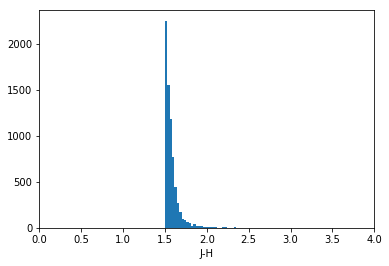

In [9]:
a=np.array([]) #J-H
b=np.array([]) # StarID
with open('JH.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:
        a=np.append(a,float(row[0])) 
plt.hist(a,bins=500) 
plt.xlim(0,4)
plt.xlabel('J-H')
plt.show()


## R3
Q:  Find the objects where Ks differs by more than 20 times the flux uncertainty from the mean flux.

### Code: 

SELECT avg(Flux1) FROM Field_1_Ks_E001; <br>
15293.9493734802  <br>
 <br>
.output uncertainty_E1fm.csv  <br>
SELECT Ks.StarID,abs(Ks.Flux1-15293.9493734802)  <br>
FROM Field_1_Ks_E001 as Ks  <br>
WHERE abs(Ks.Flux1-15293.9493734802)>20*Ks.dFlux1;  <br>
 <br>
SELECT avg(Flux1) FROM Field_1_Ks_E002;  <br>
15733.3366347595  <br>
 <br>
.output uncertainty_E2fm.csv  <br>
SELECT Ks.StarID,abs(Ks.Flux1-15733.3366347595)  <br>
FROM Field_1_Ks_E002 as Ks  <br>
WHERE abs(Ks.Flux1-15733.3366347595)>20*Ks.dFlux1;  <br>
 <br>
SELECT avg(Flux1) FROM Field_1_Ks_E003;  <br>
24904.8434534607  <br>
 <br>
.output uncertainty_E3fm.csv  <br>
SELECT Ks.StarID,abs(Ks.Flux1-24904.8434534607)  <br>
FROM Field_1_Ks_E003 as Ks  <br>
WHERE abs(Ks.Flux1-24904.8434534607)>20*Ks.dFlux1;  <br>


### A: The objects where Ks differs by more than 20 times the flux from the mean flux is plotted in a histogram as shown below.

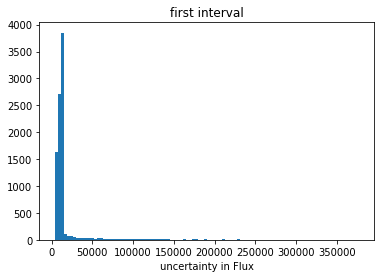

In [24]:
fm1=np.array([])
with open('uncertainty_E1fm.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:
        fm1=np.append(fm1,float(row[1]))
plt.hist(abs(fm1),bins=100) 
plt.xlabel('uncertainty in Flux')
plt.title('first interval')
plt.show()

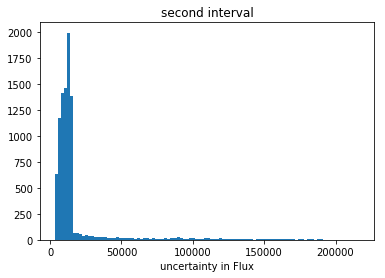

In [29]:
fm2=np.array([])
with open('uncertainty_E2fm.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:
        fm2=np.append(fm2,float(row[1]))
plt.hist(abs(fm2),bins=100) 
#plt.xlim(0,4)
plt.xlabel('uncertainty in Flux')
plt.title('second interval')
plt.show()

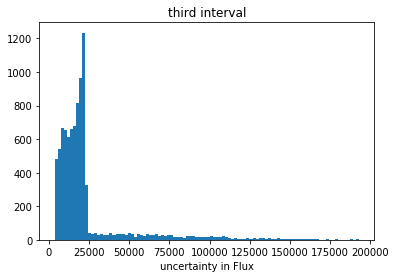

In [30]:
fm3=np.array([])
with open('uncertainty_E3fm.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:
        fm3=np.append(fm3,float(row[1]))
plt.hist(fm3,bins=100) 
#plt.xlim(0,4)
plt.xlabel('uncertainty in Flux')
plt.title('third interval')
plt.show()

## R4
Q:  Find all catalogues that exist for a given field.

### Code:
SELECT Filename <br>
FROM Reference <br>
WHERE FieldID=1; <br>

SELECT Filename <br>
FROM Reference <br>
WHERE FieldID=2; <br>

SELECT Filename <br>
FROM Reference <br>
WHERE FieldID=3; <br>

### A: 
For Field 1: <br>
<br>
Field-1-Z.csv <br>
Field-1-J.csv <br>
Field-1-H.csv <br>
Field-1-Ks-E002.csv <br>
Field-1-Ks-E001.csv <br>
Field-1-Ks-E003.csv <br>
Field-1-Y.csv <br>
<br>
For Field 2: <br>
<br>
Field-2-Z.csv <br>
Field-2-J.csv <br>
Field-2-H.csv <br>
Field-2-Ks-E001.csv <br>
Field-2-Y.csv <br>
<br>
For FIeld 3: <br>
<br>
Field-3-Z.csv <br>
Field-3-J.csv <br>
Field-3-H.csv <br>
Field-3-Ks-E002.csv <br>
Field-3-Ks-E001.csv <br>
Field-3-Y.csv <br>

## R5
Q:  For a given field retrieve the Y, Z, J, H and Ks magnitudes for all stars with S/N > 30 in Y, Z, J, H and Ks

### Code:
(Field 1 is considered) <br>
<br>
.output magnitudes.csv <br>
SELECT H.StarID,H.Mag1,J.Mag1,Z.Mag1,Y.Mag1,KsE1.Mag1,KsE2.Mag1,KsE3.Mag1 <br>
FROM Field_1_H as H <br>
JOIN Field_1_J as J ON H.StarID=J.StarID <br>
JOIN Field_1_Y as Y ON H.StarID=Y.StarID <br>
JOIN Field_1_Z as Z ON H.StarID=Z.StarID <br>
JOIN Field_1_Ks_E001 as KsE1 ON H.StarID=KsE1.StarID <br>
JOIN Field_1_Ks_E002 as KsE2 ON H.StarID=KsE2.StarID <br>
JOIN Field_1_Ks_E003 as KsE3 ON H.StarID=KsE3.StarID <br>
WHERE H.Flux1/H.dFlux1>30 AND J.Flux1/J.dFlux1>30 AND Z.Flux1/Z.dFlux1>30 AND Y.Flux1/Y.dFlux1>30 AND KsE1.Flux1/KsE1.dFlux1>30 AND KsE2.Flux1/KsE2.dFlux1>30 AND KsE3.Flux1/KsE3.dFlux1>30;

### A: Plotting all 7 histograms 

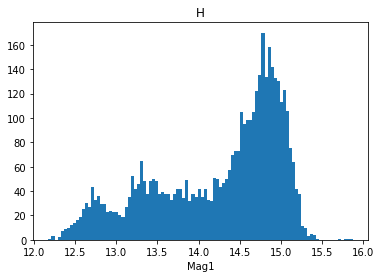

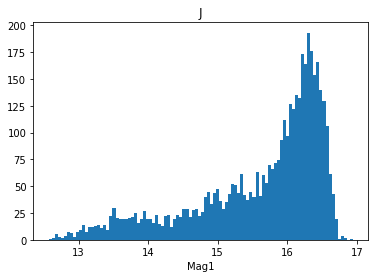

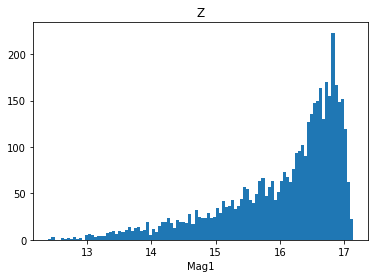

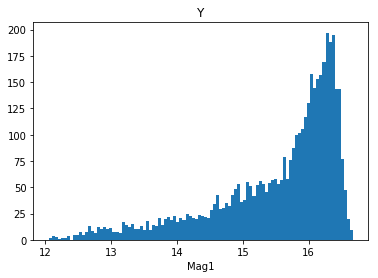

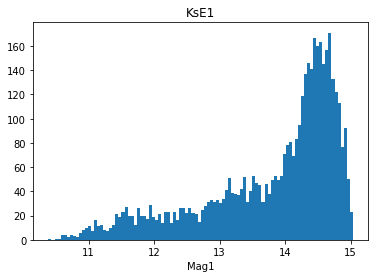

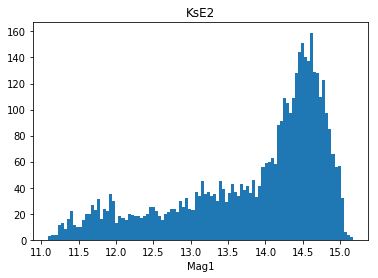

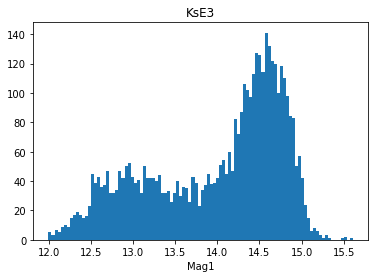

In [13]:
h=np.array([])
j=np.array([])
z=np.array([])
y=np.array([])
KsE1=np.array([])
KsE2=np.array([])
KsE3=np.array([])

with open('magnitudes.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:
        h=np.append(h,float(row[1]))
        j=np.append(j,float(row[2]))
        z=np.append(z,float(row[3]))
        y=np.append(y,float(row[4]))
        KsE1=np.append(KsE1,float(row[5]))
        KsE2=np.append(KsE2,float(row[6]))
        KsE3=np.append(KsE3,float(row[7]))

plt.hist(h,bins=100) 
plt.xlabel('Mag1')
plt.title('H')
plt.show()


plt.hist(j,bins=100) 
plt.xlabel('Mag1')
plt.title('J')
plt.show()


plt.hist(z,bins=100) 
plt.xlabel('Mag1')
plt.title('Z')
plt.show()

plt.hist(y,bins=100) 
plt.xlabel('Mag1')
plt.title('Y')
plt.show()

plt.hist(KsE1,bins=100) 
plt.xlabel('Mag1')
plt.title('KsE1')
plt.show()

plt.hist(KsE2,bins=100) 
plt.xlabel('Mag1')
plt.title('KsE2')
plt.show()

plt.hist(KsE3,bins=100) 
plt.xlabel('Mag1')
plt.title('KsE3')
plt.show()


##  Ambiguities in the constraints
There are several ambiguities in the constraints above. They are:<br>
1)Only the Flux in aperture 1 is considered for R2, R3 and R5.<br>
2)In R3 the absolute value of the uncertainity is taken. As the asked constriant is ambiguous about how the flux must differ from the mean. 



## Euclid Space Mission (Probability density estimation)


The idea is to estimate the probability density distribution of the data Y-J vs J-H and use this distribution to predict 100000 stars. <br>
To estimate the probability density distribution, Kernel Density Estimation (or KDE) with a gaussian kernel is used. <br>
Justification:<br>
KDE is used because <br>
1) It is very flexible. <br>
2) Fits the data well for the given dataset hence the prediction will be accurate. 
3) KDE is smooth

The gaussian kernel is used because at for larger datasets gaussian is more suitable as it treats every datapoint with a definable significance while estimating the probability density at one point. <br>



### Retrieving the Y-J and J-H columns
The Y-J and J-H columns are obtained from all the 3 fields. These two columns are then stored in a .csv file. 

#### Code:
.output Euclid.csv <br>
SELECT Y.Mag1-J.Mag1,J.Mag1-H.Mag1 <br>
FROM Field_1_Y as Y <br>
JOIN Field_1_J as J ON Y.StarID=J.StarID <br>
JOIN Field_1_H as H ON Y.StarID=H.StarID <br>
UNION <br>
SELECT Y.Mag1-J.Mag1,J.Mag1-H.Mag1 <br>
FROM Field_2_Y as Y <br>
JOIN Field_2_J as J ON Y.StarID=J.StarID <br>
JOIN Field_2_H as H ON Y.StarID=H.StarID <br>
UNION <br>
SELECT Y.Mag1-J.Mag1,J.Mag1-H.Mag1 <br>
FROM Field_3_Y as Y <br>
JOIN Field_3_J as J ON Y.StarID=J.StarID <br>
JOIN Field_3_H as H ON Y.StarID=H.StarID; <br>


In [14]:
yj=np.array([])
jh=np.array([])
with open('Euclid.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='|')
    for row in readCSV:
        yj=np.append(yj,float(row[0]))
        jh=np.append(jh,float(row[1]))


The data is plotted as is to assess any trends to later compare  with the simulated stars. 

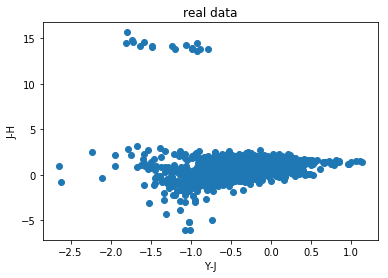

In [15]:
plt.scatter(yj,jh)
plt.xlabel('Y-J')
plt.ylabel('J-H')
plt.title('real data')
plt.show()

### Fitting the KDE 

The KDE is fit using the following code. 

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

In [17]:
S= np.vstack((yj,jh)).T

In [22]:
bws = np.linspace(0.1, 1, 10)
params = {'bandwidth': bws}

It is important to estimate the ideal bandwidth as it provides the balanced bias-variance to the density estimated. 

In [23]:
# cv=5 indicates 5-fold cross-validation
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(S, y=None, groups=None)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

best bandwidth: 0.3


In [25]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.3) 
kde.fit(S)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.3, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [26]:
Xx=kde.sample(100000)
x=Xx[:,0]
y=Xx[:,1]

## Plotting the simulated objects

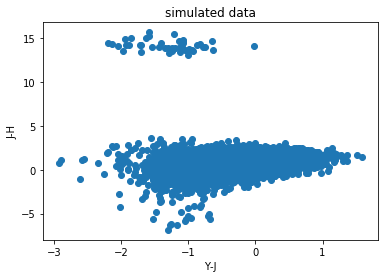

In [27]:
plt.scatter(x,y)
plt.xlabel('Y-J')
plt.ylabel('J-H')
plt.title('simulated data')
plt.show()


Observations: It is apparent that the trend of the simulated data resembles the actual data. To further estimate the likelihood of each point in the estimated distribution we can further plot the probability density. 


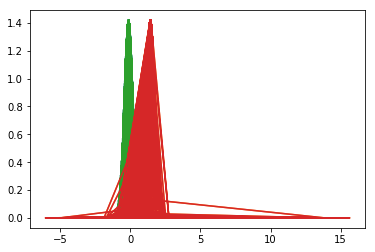

In [33]:
logprob=kde.score_samples(S)
plt.plot(S,np.exp(logprob))
plt.show()

Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

In [ ]:
# DROP TABLE Field_1_H;
# DROP TABLE Field_1_J; 
# DROP TABLE Field_1_Ks_E001; 
# DROP TABLE Field_1_Ks_E002;
# DROP TABLE Field_1_Ks_E003; 
# DROP TABLE Field_1_Y;
# DROP TABLE Field_1_Z; 
# DROP TABLE Field_2_H;
# DROP TABLE Field_2_J; 
# DROP TABLE Field_2_Ks_E001; 
# DROP TABLE Field_2_Y; 
# DROP TABLE Field_2_Z; 
# DROP TABLE Field_3_H; 
# DROP TABLE Field_3_J; 
# DROP TABLE Field_3_Ks_E001; 
# DROP TABLE Field_3_Ks_E002;
# DROP TABLE Field_3_Y; 
# DROP TABLE Field_3_Z; 

# .header On
# .mode column
# SELECT *
# FROM Field_1_H
# WHERE StarID=9998;

# FROM Reference;

The coding is mostly taken from the assignments. For the ones borrowed, the sources are mentioned as Reference. 